In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [18]:
# 读取数据
data = pd.read_csv('训练测试集.csv')


In [19]:
# 假设目标变量是最后一列，特征变量是其他列
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


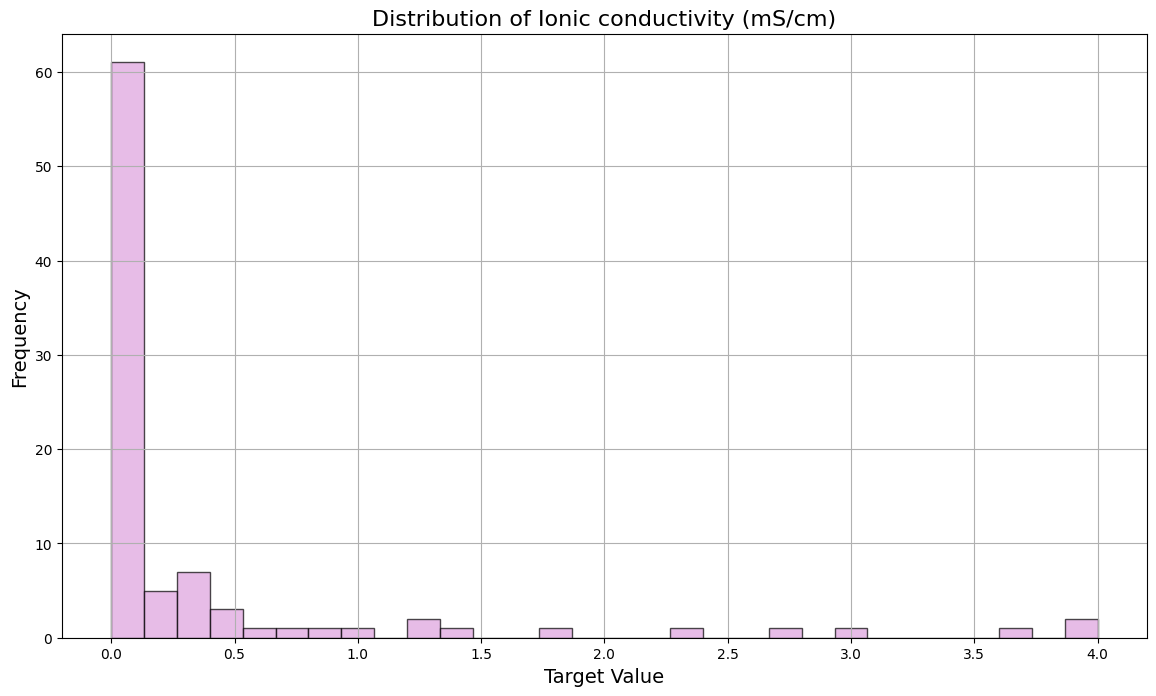

In [4]:
# 绘制目标值分布直方图
plt.figure(figsize=(14, 8), dpi=100)
plt.hist(y, bins=30, color='plum', edgecolor='black', alpha=0.7)
plt.xlabel('Target Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Ionic conductivity (mS/cm)', fontsize=16)
plt.grid(True)
plt.savefig('Target_Value_Distribution.png', dpi=300)
plt.show()
plt.close()

In [51]:

# # 筛选出目标值在0到0.5之间的数据
# filtered_data = data[(y >= 0) & (y <= 0.5)]

# # 对筛选后的数据进行重新划分
# X_filtered = filtered_data.iloc[:, :-1]
# y_filtered = filtered_data.iloc[:, -1]

# # 划分数据集为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.6, random_state=42)

# # 输出数据集大小
# print("训练集特征：", X_train.shape)
# print("测试集特征：", X_test.shape)

# ---------------------------------------------------------------------------
# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 下面是加权重的
# 假设 y_train 是一个 numpy 数组，使用 numpy 进行矢量化操作
def assign_weight(y):
    return np.where(y <= 0.15, 1, 1 + (y - 0.15) * 10)  # 根据目标值大小设置权重

# 为每个目标值分配权重
weights = assign_weight(y_train)

# 查看前几个权重值
print(weights[:5])  # 输出前10个权重值


[1. 1. 1. 1. 1.]


Linear Regression:
  MAE (Train): 0.0747
  R2 (Train): 0.9266
  MAE (Test): 176376.4115
  R2 (Test): -410266076924.6317



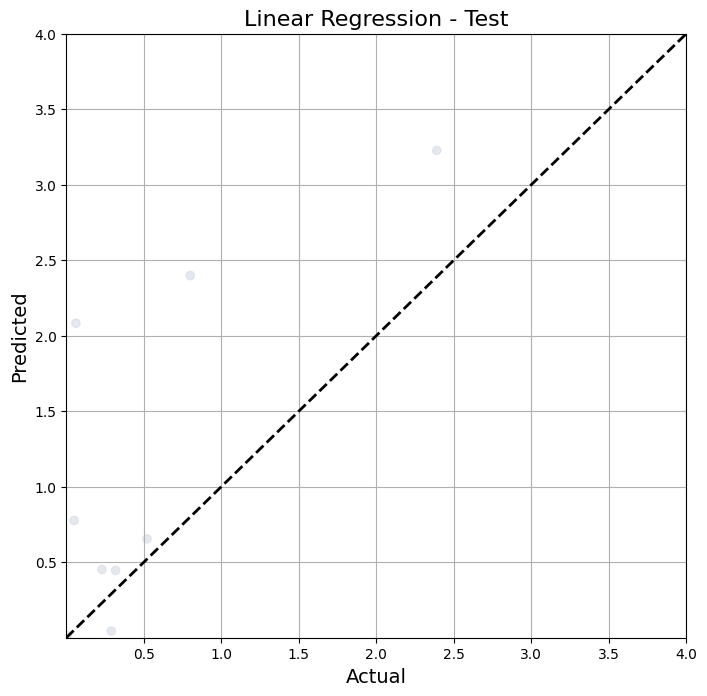

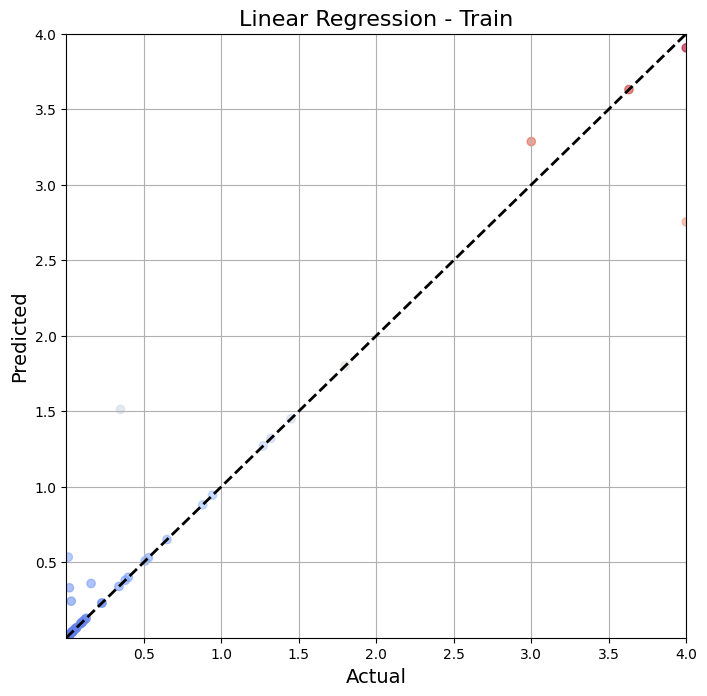

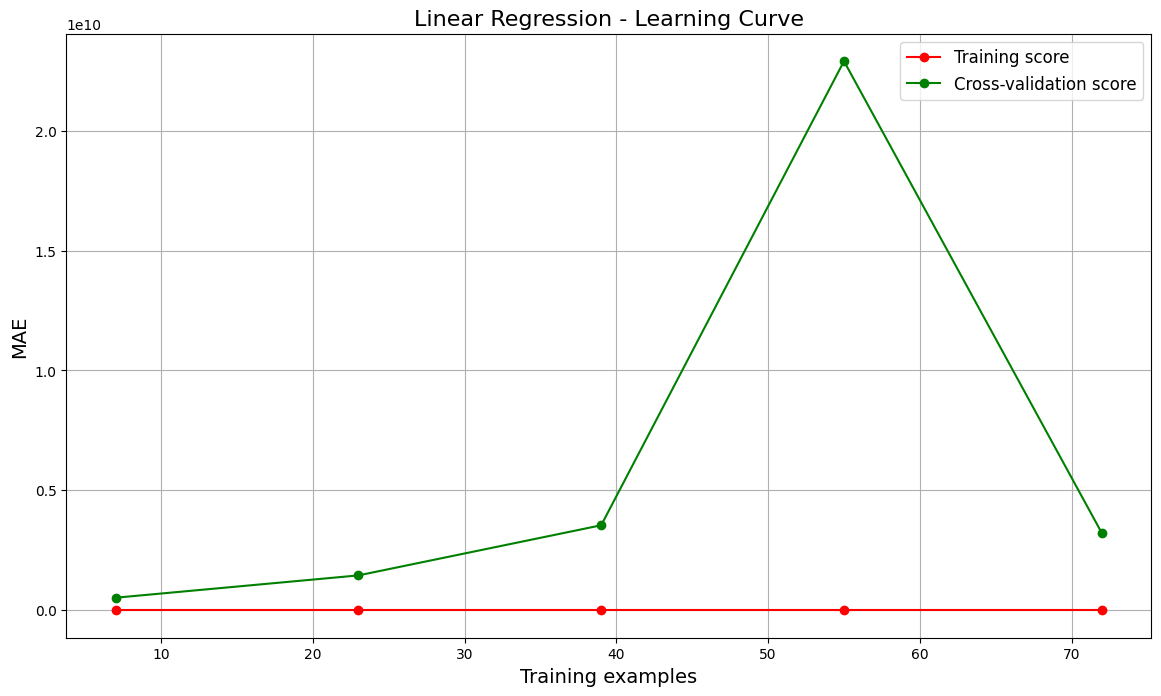

In [52]:
# 定义并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'Linear Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(model, 'Linear_Regression.joblib')

# # 绘制拟合图
# plt.figure(figsize=(8, 8), dpi=100)
# # plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
# plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('Linear Regression-test', fontsize=16)
# plt.grid(True)
# plt.savefig('Linear_Regression_test.png', dpi=300)
# plt.show
# plt.close()

# # 绘制拟合图
# plt.figure(figsize=(8, 8), dpi=100)
# # plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
# plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('Linear Regression-train', fontsize=16)
# plt.grid(True)
# plt.savefig('Linear_Regression_train.png', dpi=300)
# plt.show()
# plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('Linear Regression - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('Linear_Regression_learning_curve.png', dpi=300)
# plt.show()
# plt.close()

# 绘制拟合图 - 测试集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Linear Regression - Test', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围，使其在数据范围内
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('Linear_Regression_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图 - 训练集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Linear Regression - Train', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('Linear_Regression_train.png', dpi=300)
plt.show()
plt.close()

# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(14, 8), dpi=100)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('Linear Regression - Learning Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.savefig('Linear_Regression_learning_curve.png', dpi=300)
plt.show()
plt.close()

Ridge Regression:
  MAE (Train): 0.1615
  R2 (Train): 0.8858
  MAE (Test): 1.1729
  R2 (Test): -3.6380



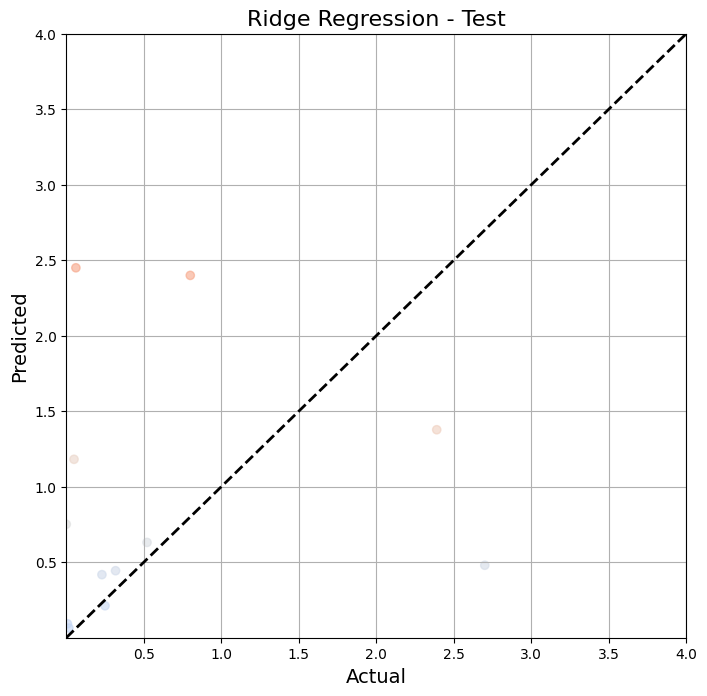

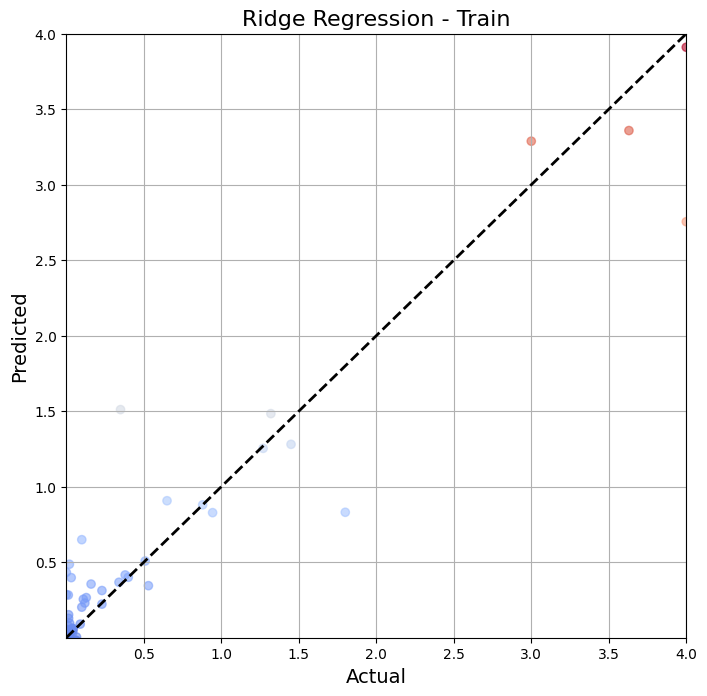

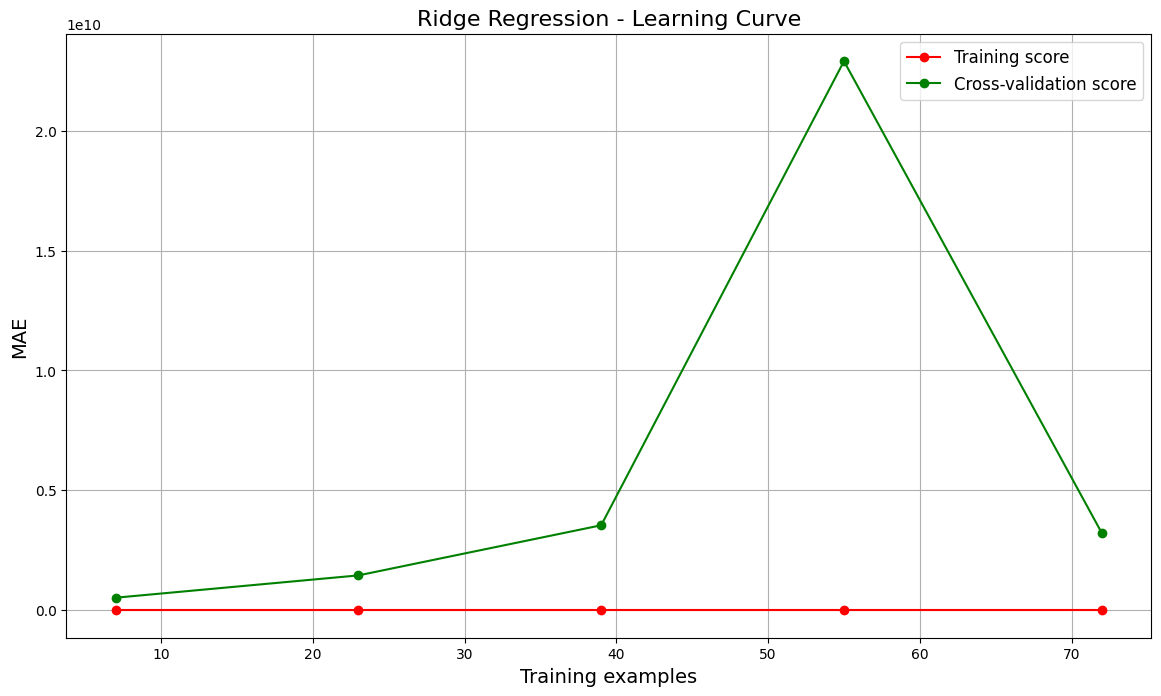

In [53]:
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
best_ridge=Ridge(alpha=0.1,fit_intercept=True, normalize=False,solver="auto",tol=1e-5)
best_ridge.fit(X_train, y_train)
# 预测
y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'Ridge Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(best_ridge, 'Ridge_Regression.joblib')

# # 绘制拟合图
# plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('Ridge Regression-test', fontsize=16)
# plt.grid(True)
# plt.savefig('Ridge_Regression-test.png', dpi=300)
# plt.show()
# plt.close()
# # 绘制拟合图
# plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('Ridge Regression-train', fontsize=16)
# plt.grid(True)
# plt.savefig('Ridge_Regression-train.png', dpi=300)
# plt.show()
# plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(best_ridge, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('Ridge Regression - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('Ridge_Regression_learning_curve.png', dpi=300)
# plt.show()
# plt.close()


# 绘制拟合图 - 测试集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Ridge Regression - Test', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围，使其在数据范围内
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('Ridge Regression_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图 - 训练集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Ridge Regression - Train', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('Ridge Regression_train.png', dpi=300)
plt.show()
plt.close()

# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(14, 8), dpi=100)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('Ridge Regression - Learning Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.savefig('Ridge Regression_learning_curve.png', dpi=300)
plt.show()
plt.close()

Decision Tree Regression (Manual Hyperparameters):
  MAE (Train): 0.0000
  R2 (Train): 1.0000
  MAE (Test): 0.5241
  R2 (Test): -0.8491



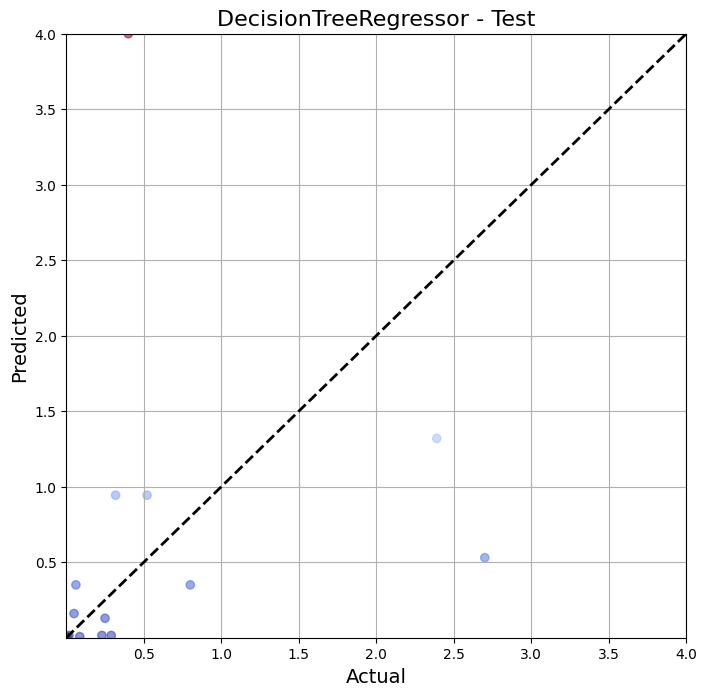

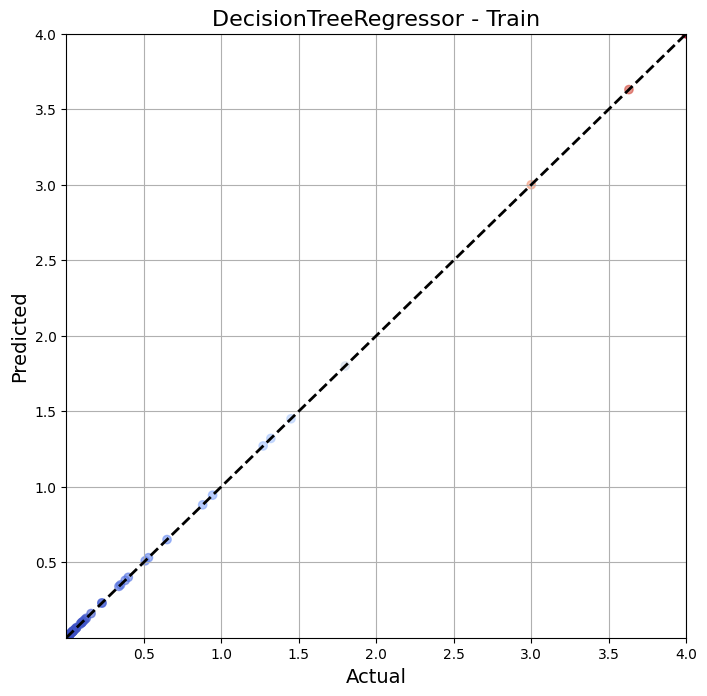

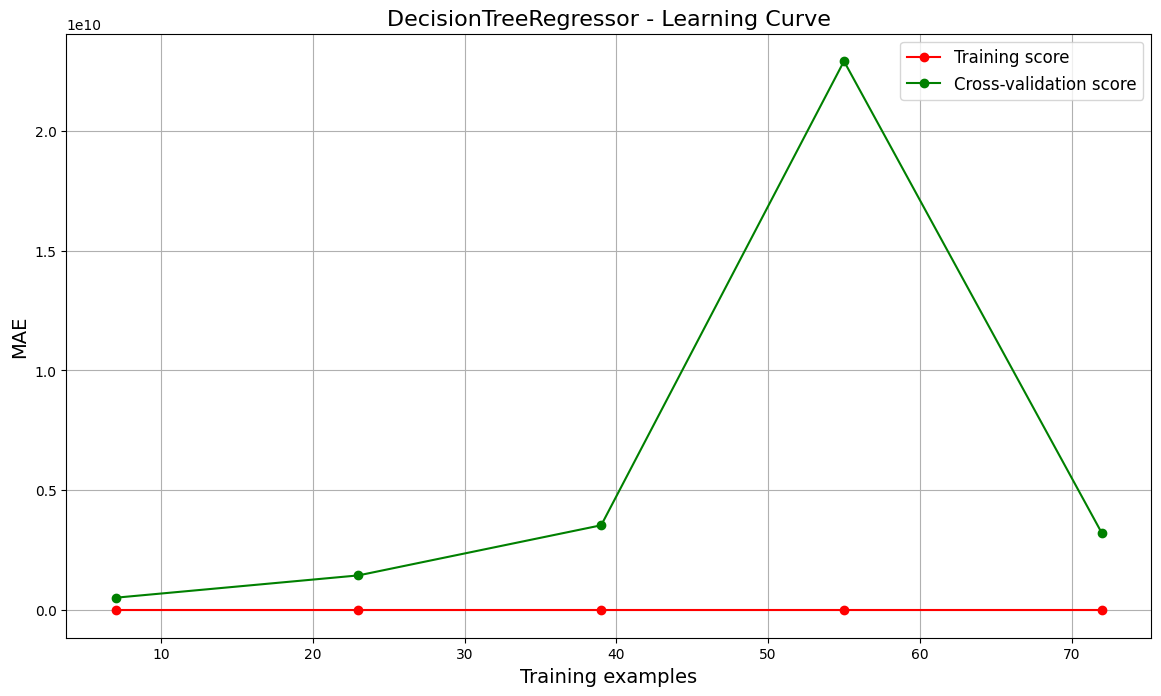

In [54]:
# 手动选择决策树回归的超参数
tree = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# 训练模型
tree.fit(X_train, y_train)

# 预测
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'Decision Tree Regression (Manual Hyperparameters):\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(tree, 'Decision_Tree_Regression_Manual.joblib')

# # 绘制拟合图
# plt.figure(figsize=(8, 8), dpi=100)
# # plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
# plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('Decision Tree Regression (Manual)-test', fontsize=16)
# plt.grid(True)
# plt.savefig('Decision_Tree_Regression_manual_test.png', dpi=300)
# plt.show()
# plt.close()

# # 绘制拟合图
# plt.figure(figsize=(8, 8), dpi=100)
# # plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
# plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('Decision Tree Regression-train', fontsize=16)
# plt.grid(True)
# plt.savefig('Decision_Tree_Regression_train.png', dpi=300)
# plt.show()
# plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(tree, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('Decision Tree Regression (Manual) - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('Decision_Tree_Regression_manual_learning_curve.png', dpi=300)
# plt.show()
# plt.close()
# 绘制拟合图 - 测试集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('DecisionTreeRegressor - Test', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围，使其在数据范围内
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('DecisionTreeRegressor_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图 - 训练集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('DecisionTreeRegressor - Train', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('DecisionTreeRegressor_train.png', dpi=300)
plt.show()
plt.close()

# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(14, 8), dpi=100)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('DecisionTreeRegressor - Learning Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.savefig('DecisionTreeRegressor_learning_curve.png', dpi=300)
plt.show()
plt.close()

RandomForestRegressor (Manual Hyperparameters):
  MAE (Train): 0.1100
  R2 (Train): 0.9281
  MAE (Test): 0.4904
  R2 (Test): -0.5827



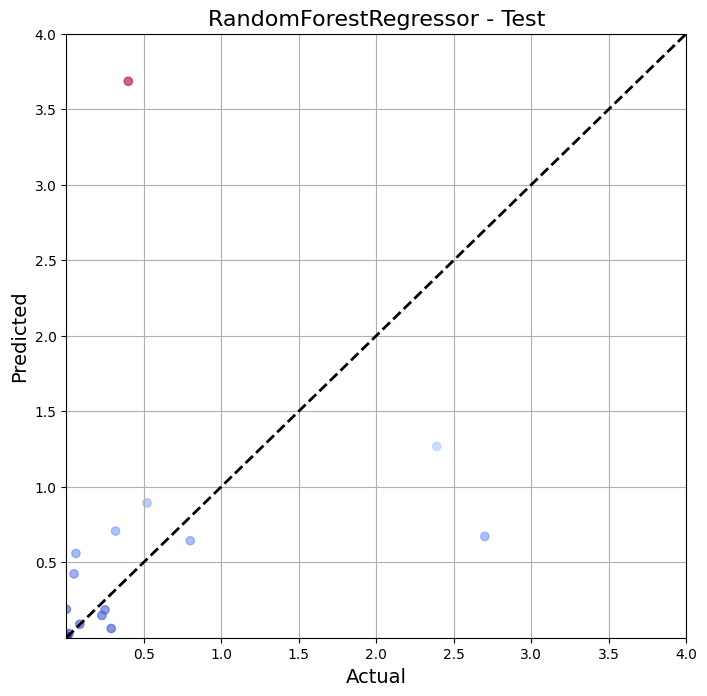

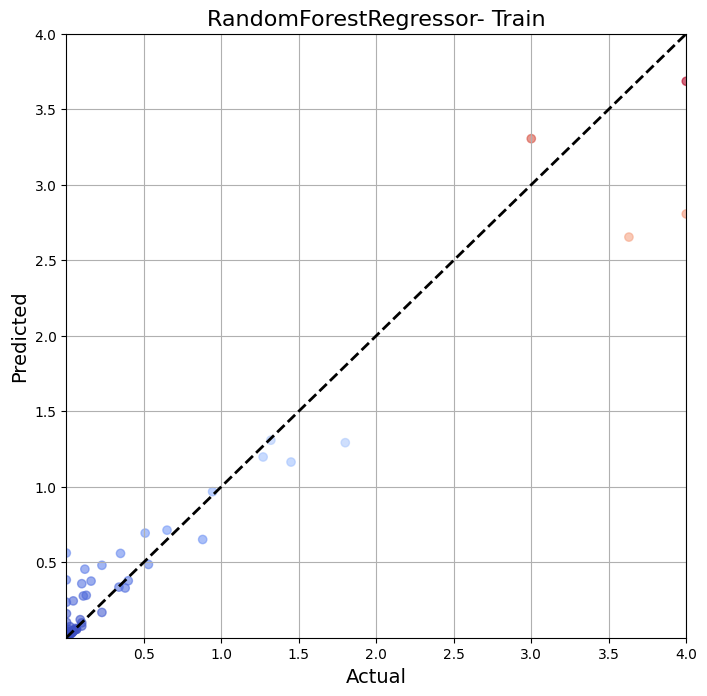

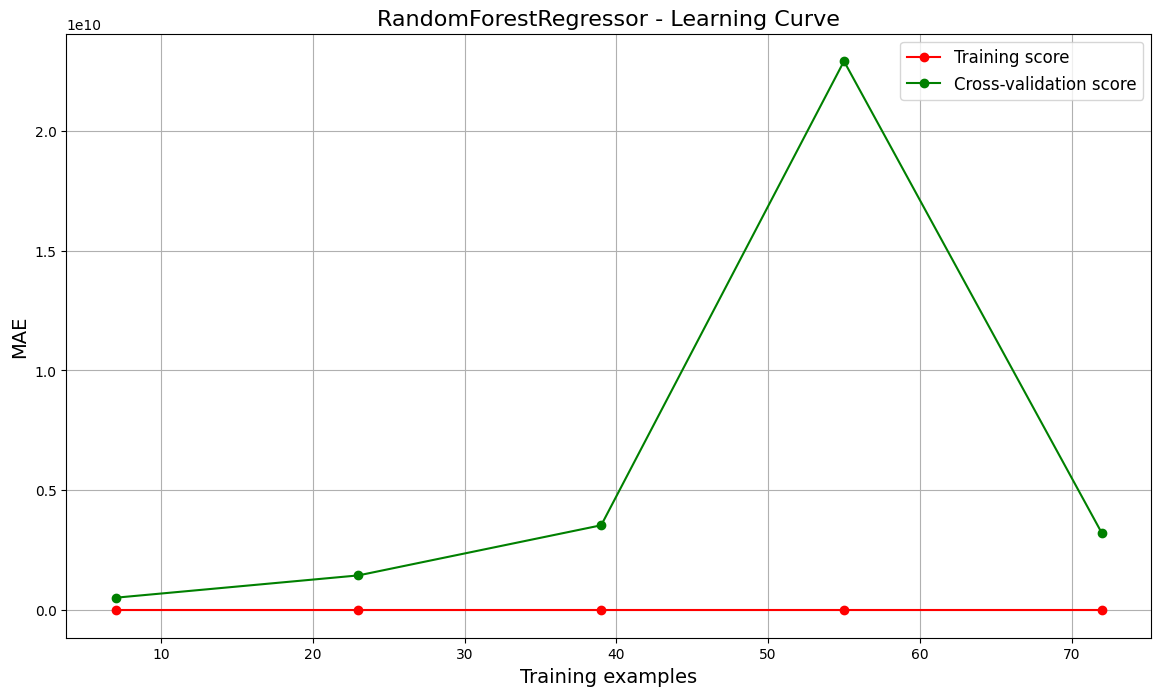

In [55]:
# 初始化随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# 训练模型
rf.fit(X_train, y_train)

# 预测
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'RandomForestRegressor (Manual Hyperparameters):\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(tree, 'Random_forest_Regression_Manual.joblib')

# # 绘制拟合图
# plt.figure(figsize=(8, 8), dpi=100)
# # plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
# plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('Random forest (Manual)-test', fontsize=16)
# plt.grid(True)
# plt.savefig('Random_forest_manual_test.png', dpi=300)
# plt.show()  # 显示图像
# plt.close()

# # 绘制拟合图
# plt.figure(figsize=(8, 8), dpi=100)
# # plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
# plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('Random_forest-train', fontsize=16)
# plt.grid(True)
# plt.savefig('Random_forest_Regression_train.png', dpi=300)
# plt.show()  # 显示图像
# plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(tree, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('Random_forest_Regression (Manual) - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.show()  # 显示图像
# plt.savefig('Random_forest_Regression_manual_learning_curve.png', dpi=300)
# plt.close()
# 绘制拟合图 - 测试集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('RandomForestRegressor - Test', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围，使其在数据范围内
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('RandomForestRegressor_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图 - 训练集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('RandomForestRegressor- Train', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('RandomForestRegressor_train.png', dpi=300)
plt.show()
plt.close()

# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(14, 8), dpi=100)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('RandomForestRegressor - Learning Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.savefig('RandomForestRegressor_curve.png', dpi=300)
plt.show()
plt.close()

XGBoost Regression:
  MAE (Train): 0.0007
  R2 (Train): 1.0000
  MAE (Test): 0.4986
  R2 (Test): -0.8048



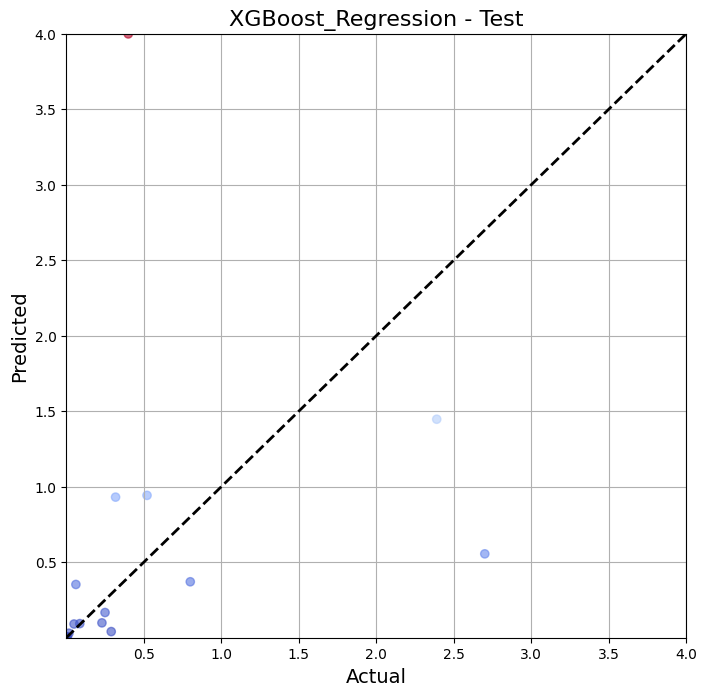

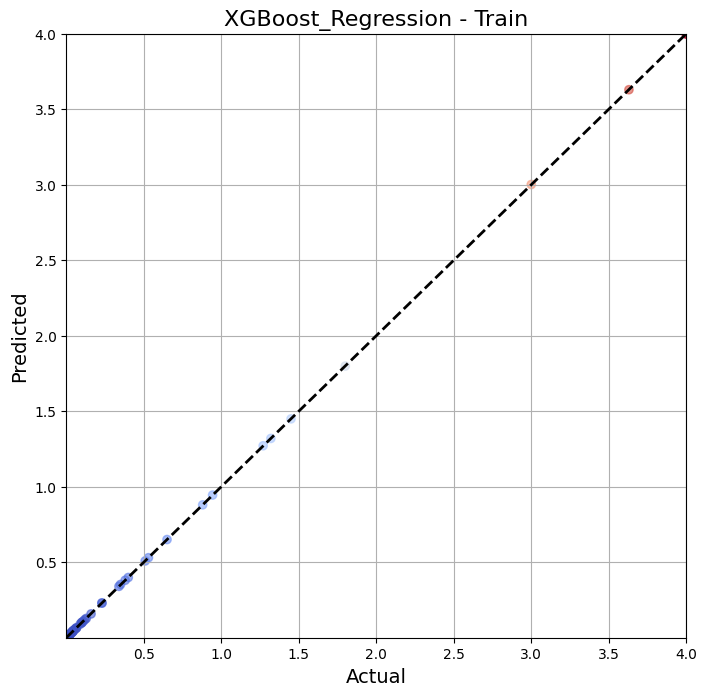

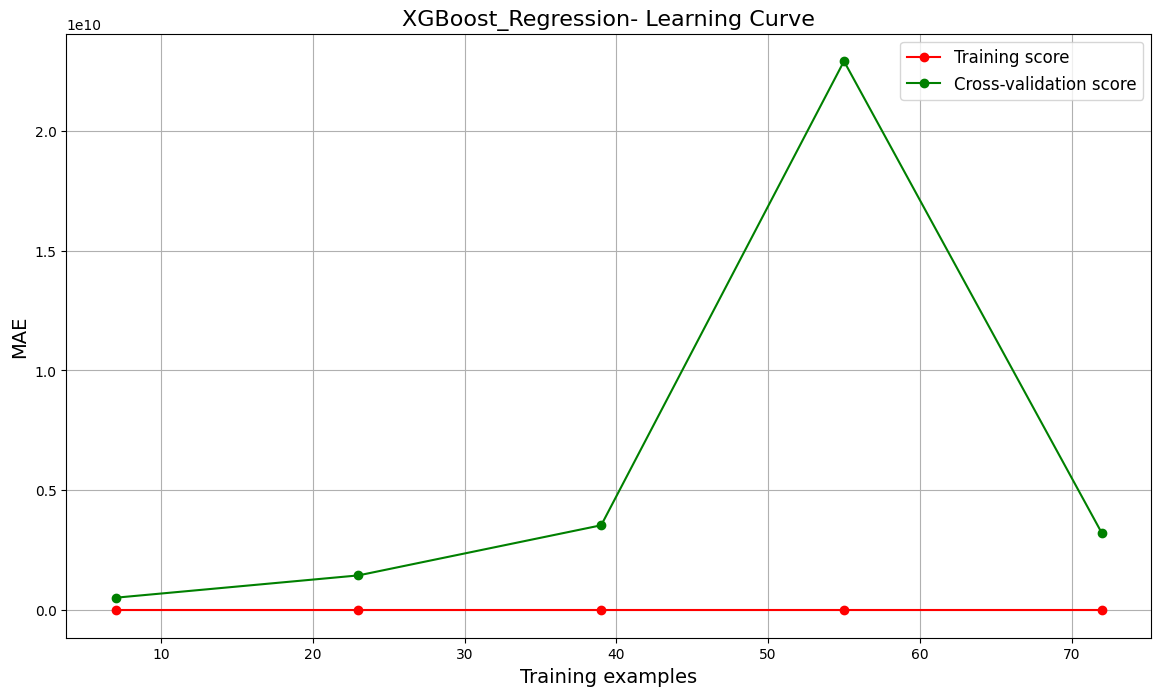

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import joblib
# 初始化XGBoost回归模型
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=200, seed=42)

# 训练模型
xg_reg.fit(X_train, y_train)

# 预测
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'XGBoost Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(xg_reg, 'XGBoost_Regression.joblib')

# 绘制拟合图 - 测试集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('XGBoost_Regression - Test', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围，使其在数据范围内
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('XGBoost_Regression_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图 - 训练集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('XGBoost_Regression - Train', fontsize=16)
plt.grid(True)

# 手动设置坐标轴范围
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])

plt.savefig('XGBoost_Regression_train.png', dpi=300)
plt.show()
plt.close()

# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(14, 8), dpi=100)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('XGBoost_Regression- Learning Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.savefig('XGBoost_Regression_learning_curve.png', dpi=300)
plt.show()
plt.close()

In [77]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
# /这个比较耗时
# 定义要搜索的超参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# 初始化XGBoost回归器
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# 使用GridSearchCV来搜索最佳超参数组合
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# 拟合模型
grid_search.fit(X_train, y_train)

# 获取最佳超参数
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# 使用最佳超参数重新训练模型
best_xg_reg = grid_search.best_estimator_

# 预测
y_train_pred = best_xg_reg.predict(X_train)
y_test_pred = best_xg_reg.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'XGBoost Regression with Best Parameters:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存最佳模型
joblib.dump(best_xg_reg, 'Best_XGBoost_Regression.joblib')

# 绘制拟合图（测试集）
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('XGBoost_Regression - Test', fontsize=16)
plt.grid(True)
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.savefig('Best_XGBoost_Regression_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图（训练集）
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('XGBoost_Regression - Train', fontsize=16)
plt.grid(True)
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.savefig('Best_XGBoost_Regression_train.png', dpi=300)
plt.show()
plt.close()

# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(best_xg_reg, X, y, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(14, 8), dpi=100)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('Best XGBoost_Regression- Learning Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.savefig('Best_XGBoost_Regression_learning_curve.png', dpi=300)
plt.show()
plt.close()


ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

ExtraTrees Regression:
  MAE (Train): 0.0000
  R2 (Train): 1.0000
  MAE (Test): 0.5430
  R2 (Test): -0.9425



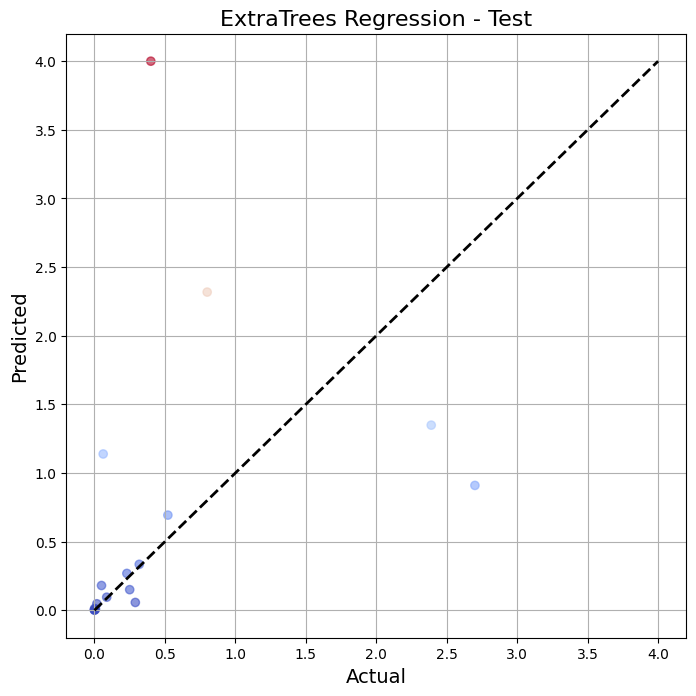

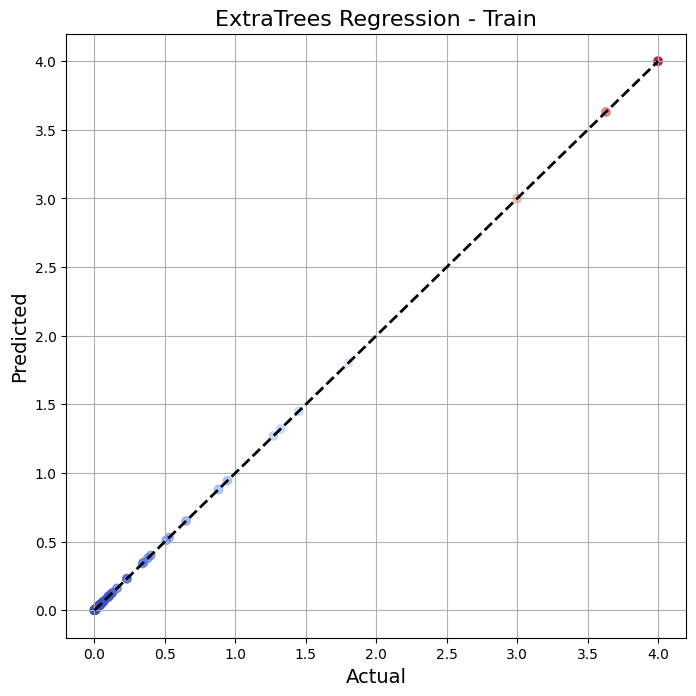

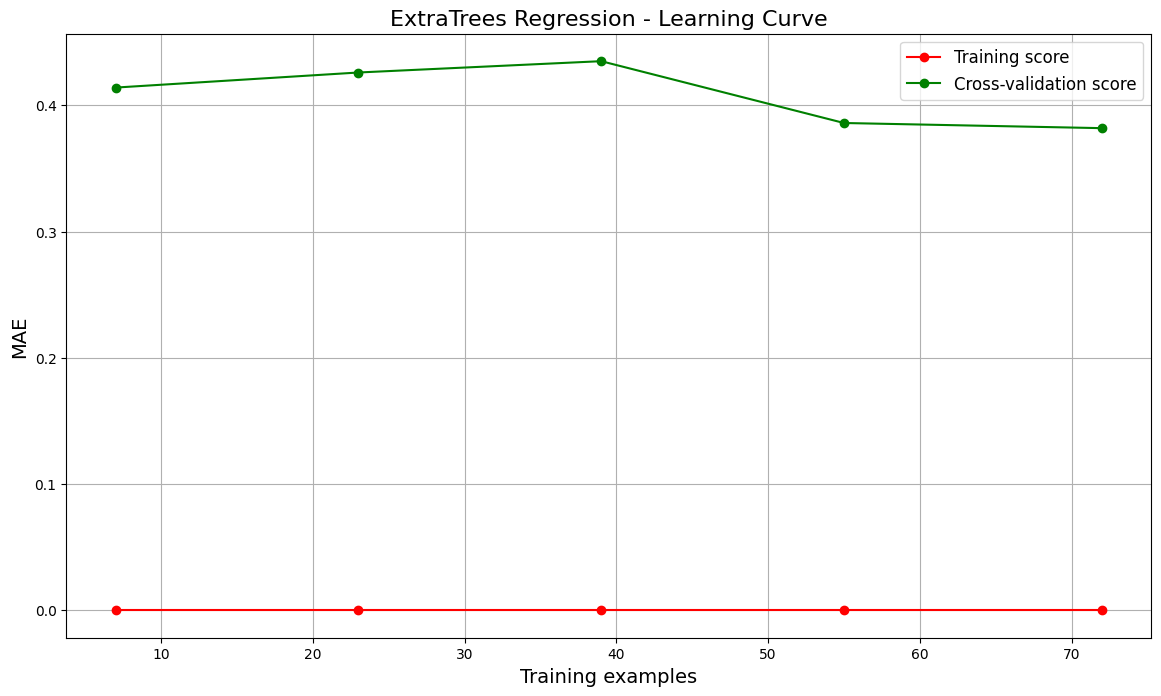

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
import joblib
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
# # 设置超参数范围---------------------------------------------
# # 定义模型
# etr_best = ExtraTreesRegressor(random_state=42)


# param_dist = {
#     'n_estimators': randint(50, 200),
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # 随机搜索
# random_search = RandomizedSearchCV(estimator=etr_best, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=42)
# random_search.fit(X_train, y_train)

# # 输出最佳超参数和评分
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Score (Negative MAE):", random_search.best_score_)
# 寻找超参数-----------------------------------------------------------


# 初始化极端随机树回归模型并设置超参数
etr = ExtraTreesRegressor(max_depth=None, max_features='auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 65)

# 训练模型
etr.fit(X_train, y_train)

# 预测
y_train_pred = etr.predict(X_train)
y_test_pred = etr.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'ExtraTrees Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(etr, 'ExtraTrees_Regression.joblib')

# 绘制拟合图 - 测试集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('ExtraTrees Regression - Test', fontsize=16)
plt.grid(True)
plt.savefig('ExtraTrees_Regression_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图 - 训练集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('ExtraTrees Regression - Train', fontsize=16)
plt.grid(True)
plt.savefig('ExtraTrees_Regression_train.png', dpi=300)
plt.show()
plt.close()

# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(etr, X, y, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(14, 8), dpi=100)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('ExtraTrees Regression - Learning Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.savefig('ExtraTrees_Regression_learning_curve.png', dpi=300)
plt.show()
plt.close()


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
import numpy as np
# 寻找超参数
# 定义超参数空间
# 定义超参数空间
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # 不同层数和节点数
    'activation': ['relu', 'tanh'],                    # 激活函数
    'solver': ['adam', 'lbfgs'],                       # 求解器
    'alpha': [0.0001, 0.001, 0.01],                    # L2 正则化
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # 学习率调节策略
}

# 创建 MLP 模型
mlp = MLPRegressor(max_iter=1000)

# 使用网格搜索
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳超参数组合和得分
print("Best hyperparameters:", grid_search.best_params_)
print("Best score (Negative MSE):", grid_search.best_score_)

# 获取最佳模型
best_model = grid_search.best_estimator_

# 在测试集上进行预测
y_test_pred = best_model.predict(X_test)

# 计算 MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_test_pred)

# 计算 RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 计算 R2 (R-squared)
r2 = r2_score(y_test, y_test_pred)

# 计算 RMAE (Relative Mean Absolute Error)
rmae = mae / np.mean(y_test)

# 输出所有评估指标
print(f"MAE (Test): {mae:.4f}")
print(f"RMSE (Test): {rmse:.4f}")
print(f"R2 (Test): {r2:.4f}")
print(f"RMAE (Test): {rmae:.4f}")



Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "/public/home/huangyiru/.conda/envs/myenv/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/public/home/huangyiru/.conda/envs/myenv/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py", line 566, in run
    self.terminate_broken(bpe)
  File "/public/home/huangyiru/.conda/envs/myenv/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py", line 750, in terminate_broken
    self.kill_workers(reason="broken executor")
  File "/public/home/huangyiru/.conda/envs/myenv/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py", line 781, in kill_workers
    recursive_terminate(p)
  File "/public/home/huangyiru/.conda/envs/myenv/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py", line 28, in recursive_terminate
    _recursive_terminate_without_psutil(process)
  File "/public/home/huangyiru/.conda/envs/myenv/lib/pytho

In [ ]:

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import mean_absolute_error, r2_score
# import joblib
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# import numpy as np

# # 构建深度神经网络（MLP）
# model = Sequential()
# model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))  # 回归任务，输出一个连续值

# # 编译模型
# model.compile(optimizer=Adam(), loss='mean_squared_error')

# # 训练模型
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# # 预测训练集和测试集
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # 计算评估指标
# mae_train = mean_absolute_error(y_train, y_train_pred)
# r2_train = r2_score(y_train, y_train_pred)
# mae_test = mean_absolute_error(y_test, y_test_pred)
# r2_test = r2_score(y_test, y_test_pred)

# # 打印评估结果
# print(f'MLP Regression:\n'
#       f'  MAE (Train): {mae_train:.4f}\n'
#       f'  R2 (Train): {r2_train:.4f}\n'
#       f'  MAE (Test): {mae_test:.4f}\n'
#       f'  R2 (Test): {r2_test:.4f}\n')

# # 保存模型
# # 保存 Keras 模型
# model.save('MLP_model.h5')


# # 绘制拟合图 - 测试集
# plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('MLP_Regression - Test', fontsize=16)
# plt.grid(True)
# plt.xlim([y.min(), y.max()])
# plt.ylim([y.min(), y.max()])
# plt.savefig('MLP_Regression_test.png', dpi=300)
# plt.show()
# plt.close()

# # 绘制拟合图 - 训练集
# plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Actual', fontsize=14)
# plt.ylabel('Predicted', fontsize=14)
# plt.title('MLP_Regression - Train', fontsize=16)
# plt.grid(True)
# plt.xlim([y.min(), y.max()])
# plt.ylim([y.min(), y.max()])
# plt.savefig('MLP_Regression_train.png', dpi=300)
# plt.show()
# plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('MLP_Regression - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('MLP_Regression_learning_curve.png', dpi=300)
# plt.show()
# plt.close()

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# 构建深度神经网络（MLP）
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # 回归任务，输出一个连续值
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# 使用 KerasRegressor 包装 Keras 模型
model = KerasRegressor(build_fn=build_model, epochs=100, batch_size=32, verbose=1)

# 训练模型
history = model.fit(X_train, y_train, validation_split=0.2)

# 预测训练集和测试集
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 计算评估指标
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'MLP Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 绘制拟合图 - 测试集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('MLP_Regression - Test', fontsize=16)
plt.grid(True)
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.savefig('MLP_Regression_test.png', dpi=300)
plt.show()

# 绘制拟合图 - 训练集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('MLP_Regression - Train', fontsize=16)
plt.grid(True)
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.savefig('MLP_Regression_train.png', dpi=300)
plt.show()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('MLP_Regression - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('MLP_Regression_learning_curve.png', dpi=300)
# plt.show()
# 保存模型到文件
joblib.dump(mlp, 'mlp_model.joblib')

In [36]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image

In [ ]:
# X = data.values[:, :-1]
# y = data.values[:, -1]
# X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


# for i in range(X_train.shape[1]):
#     X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



# for i in range(X_test.shape[1]):
#     X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [ ]:
# feature_names = list(data.columns[:-1])

In [37]:
# 定义符号回归模型，并使用训练数据拟合模型
reg = SymbolicRegressor(population_size=1000, generations=50, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs'],
                         metric='mean absolute error', stopping_criteria=0.000001,
                         random_state=1)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.54          102.001        4         0.363132              N/A     18.46s
   1     2.24          4.81795        3         0.336143              N/A     17.79s
   2     2.63         0.680828        5         0.334603              N/A     17.28s
   3     2.63         0.412643        7         0.318169              N/A     17.04s
   4     3.58          0.42587        7         0.317703              N/A     16.99s
   5     3.03         0.566474        3         0.319822              N/A     16.54s
   6     3.02         0.340398        3         0.319822              N/A     16.19s
   7     3.05         0.329521        3         0.319822              N/A     15.86s
   8     2.99         0.335531        3         0.319822              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs'],
                  generations=50, random_state=1, stopping_criteria=1e-06,
                  verbose=1)

In [38]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.3657157644478574


In [39]:
# 保存符号回归模型
joblib.dump(reg, 'symbolic_regression_model.pkl')


['symbolic_regression_model.pkl']

In [40]:
# 计算 MAE, MSE, RMSE, R2 和 RMAE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rmae = mae / np.mean(np.abs(y_test))  # 计算相对平均绝对误差 (RMAE)

# 打印结果
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")
print(f"RMAE: {rmae:.4f}")

# # 计算 MAE, MSE, RMSE, R2 和 RMAE
# mae = mean_absolute_error(y_train, y_pred)
# mse = mean_squared_error(y_train, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_train, y_pred)
# rmae = mae / np.mean(np.abs(y_train))  # 计算相对平均绝对误差 (RMAE)

# # 打印结果
# print(f"train_MAE: {mae:.4f}")
# print(f"train_MSE: {mse:.4f}")
# print(f"train_RMSE: {rmse:.4f}")
# print(f"train_R2: {r2:.4f}")
# print(f"train_RMAE: {rmae:.4f}")

MAE: 0.3657
MSE: 0.5117
RMSE: 0.7153
R2: 0.1409
RMAE: 0.8103


In [ ]:
# 在每一代训练完成后打印最优个体的树图
for generation in range(len(reg._best_of_generation)):
    best_individual = reg._best_of_generation[generation]
    plt.figure(figsize=(10, 8))
    plot_tree(best_individual)
    plt.title(f"Best Tree at Generation {generation + 1}")
    plt.show()

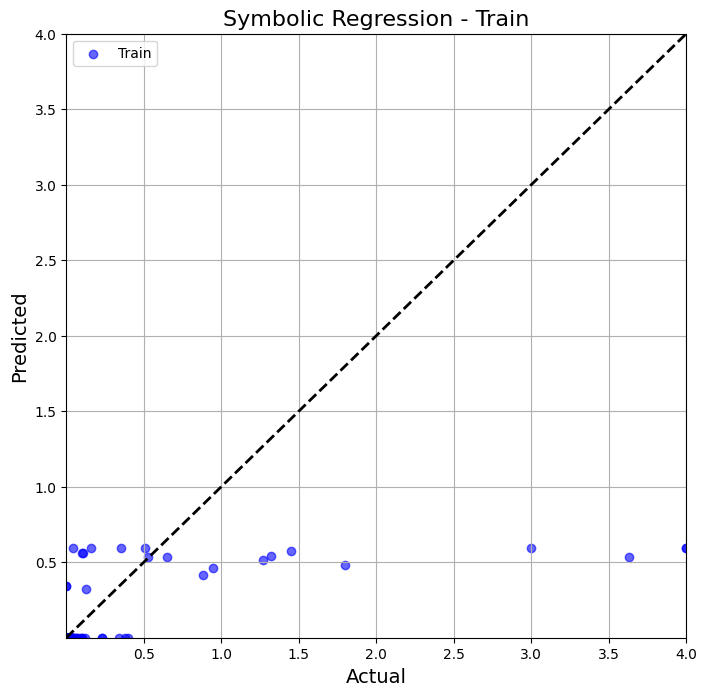

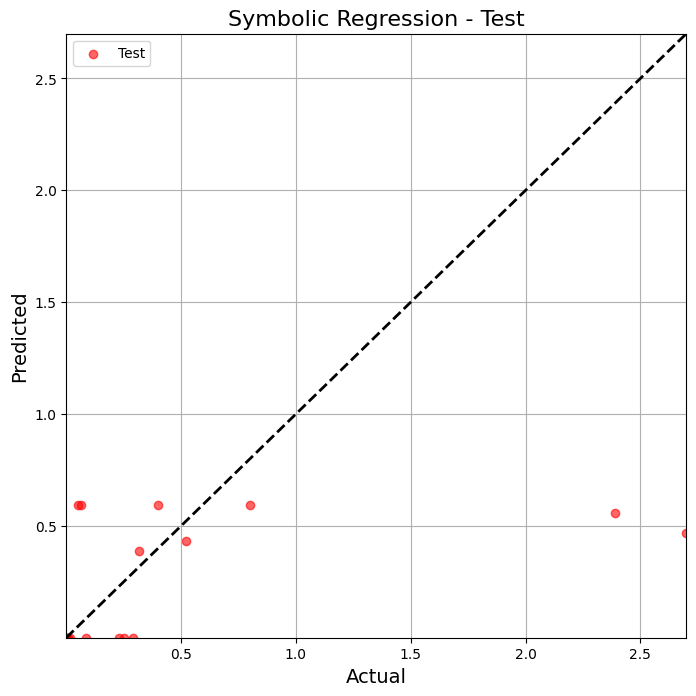

In [41]:
# 绘制训练集拟合图
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, reg.predict(X_train), c='blue', alpha=0.6, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Symbolic Regression - Train', fontsize=16)
plt.grid(True)
plt.xlim([y_train.min(), y_train.max()])
plt.ylim([y_train.min(), y_train.max()])
plt.legend()
plt.show()

# 绘制测试集拟合图
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_pred, c='red', alpha=0.6, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Symbolic Regression - Test', fontsize=16)
plt.grid(True)
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.legend()
plt.show()
